In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('mobile_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.shape

(2000, 21)

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [11]:
df['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [12]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

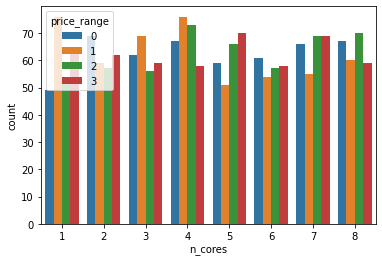

In [14]:
sns.countplot(x = df['n_cores'], hue=df['price_range'])
plt.show()

In [15]:
df['ram'].nunique()

1562

In [16]:
df.groupby(['price_range']).agg({'ram':['min','max','sum','mean','count','median'],
                                'clock_speed':['min','max','sum','mean','count','median']})

ram                                        clock_speed       \
              min   max      sum      mean count  median         min  max   
price_range                                                                 
0             256  1974   392657   785.314   500   719.5         0.5  3.0   
1             387  2811   839745  1679.490   500  1686.5         0.5  3.0   
2            1185  3916  1291408  2582.816   500  2577.0         0.5  3.0   
3            2259  3998  1724616  3449.232   500  3509.5         0.5  3.0   

                                         
               sum    mean count median  
price_range                              
0            775.1  1.5502   500   1.55  
1            744.3  1.4886   500   1.50  
2            764.9  1.5298   500   1.50  
3            760.2  1.5204   500   1.50

In [17]:
d1 = df.groupby(['price_range']).agg({'ram':['min','max','mean','median'],
                                'clock_speed':['min','max','mean','median']})
d1

ram                         clock_speed                    
              min   max      mean  median         min  max    mean median
price_range                                                              
0             256  1974   785.314   719.5         0.5  3.0  1.5502   1.55
1             387  2811  1679.490  1686.5         0.5  3.0  1.4886   1.50
2            1185  3916  2582.816  2577.0         0.5  3.0  1.5298   1.50
3            2259  3998  3449.232  3509.5         0.5  3.0  1.5204   1.50

In [18]:
d2 = df.groupby(['price_range']).agg({'battery_power':['min','max','mean','median'],
                                'int_memory':['min','max','mean','median']})
d2

battery_power                         int_memory              \
                      min   max      mean  median        min max    mean   
price_range                                                                
0                     503  1994  1116.902  1066.0          2  64  31.174   
1                     501  1996  1228.868  1206.0          2  64  32.116   
2                     501  1998  1228.320  1219.5          2  64  30.920   
3                     503  1994  1379.984  1449.5          2  64  33.976   

                    
            median  
price_range         
0             30.0  
1             32.0  
2             30.0  
3             34.5

In [19]:
d3 = df.groupby(['price_range']).agg({'pc':['min','max','mean','median'],
                                'fc':['min','max','mean','median']})
d3

pc                     fc                  
            min max    mean median min max   mean median
price_range                                             
0             0  20   9.574    9.5   0  19  4.084      3
1             0  20   9.924   10.0   0  18  4.340      3
2             0  20  10.018   10.0   0  18  4.498      3
3             0  20  10.150   10.0   0  18  4.316      3

In [20]:
d4 = df.groupby(['price_range']).agg({'n_cores':['min','max','mean','median'],
                                'mobile_wt':['min','max','mean','median']})
d4

n_cores                   mobile_wt                     
                min max   mean median       min  max     mean median
price_range                                                         
0                 1   8  4.600      5        80  200  140.552    142
1                 1   8  4.298      4        80  200  140.510    141
2                 1   8  4.682      5        80  200  143.614    145
3                 1   8  4.502      5        80  200  136.320    134

In [21]:
d5 = df.groupby(['price_range']).agg({'px_height':['min','max','mean','median'],
                                'px_width':['min','max','mean','median']})
d5

px_height                       px_width                        
                  min   max     mean median      min   max      mean  median
price_range                                                                 
0                   1  1878  536.408  465.5      500  1989  1150.270  1132.5
1                   0  1914  666.892  606.0      500  1998  1251.908  1223.0
2                  10  1960  632.284  538.5      508  1997  1234.046  1221.5
3                   0  1949  744.848  674.0      501  1995  1369.838  1415.5

In [23]:
d6 = df.groupby(['price_range']).agg({'sc_h':['min','max','mean','median'],
                                'sc_w':['min','max','mean','median']})
d6

sc_h                    sc_w                  
             min max    mean median  min max   mean median
price_range                                               
0              5  19  12.324     12    0  18  5.682      5
1              5  19  12.212     12    0  18  5.544      5
2              5  19  12.010     12    0  17  5.714      5
3              5  19  12.680     13    0  18  6.128      5

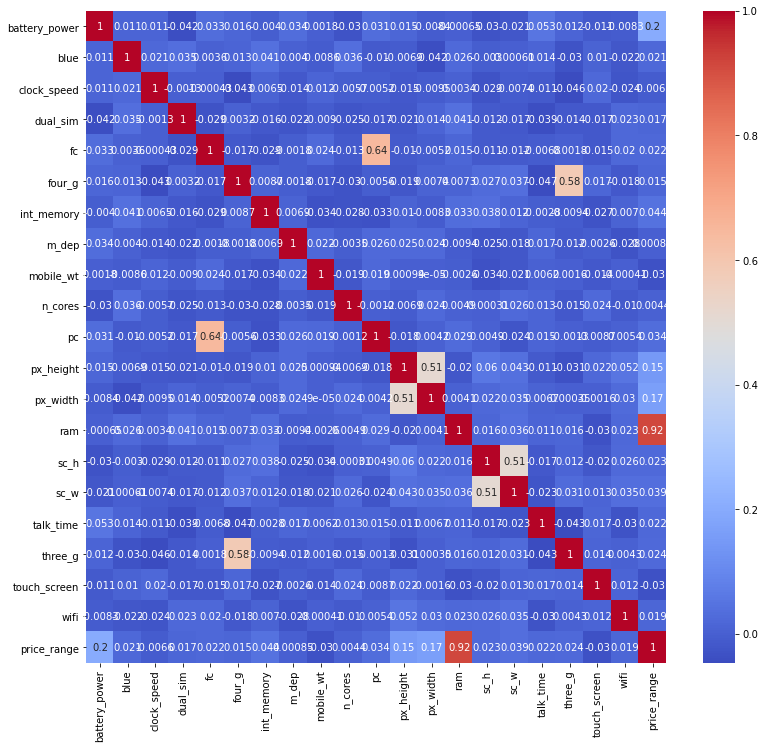

In [24]:
corr = df.corr()
plt.figure(figsize=(13,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

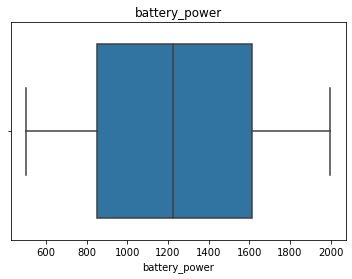

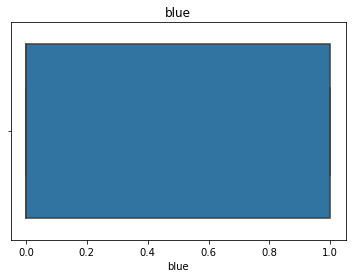

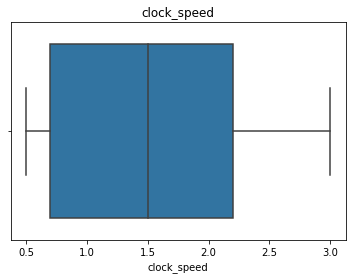

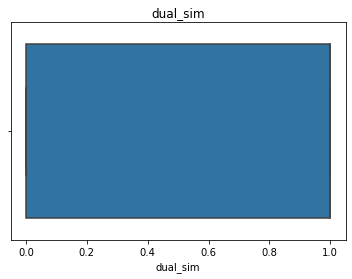

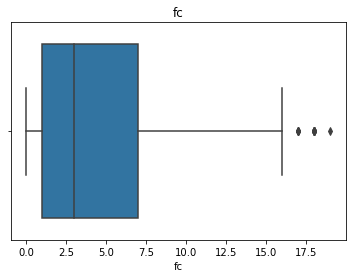

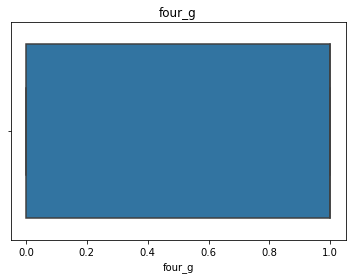

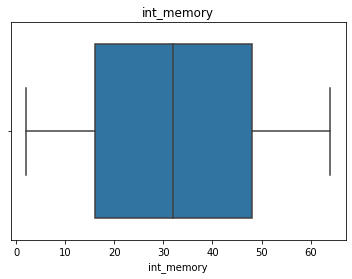

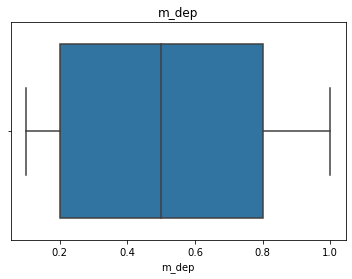

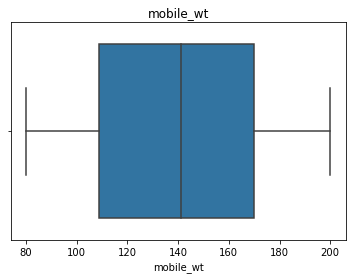

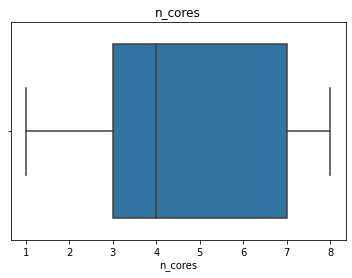

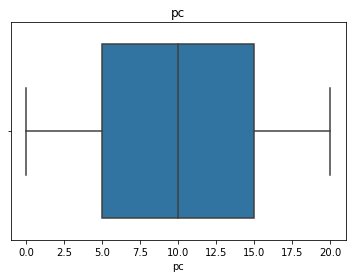

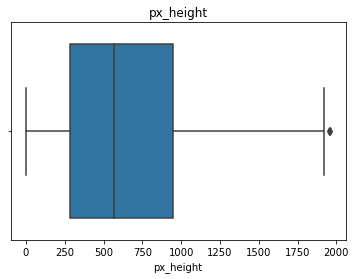

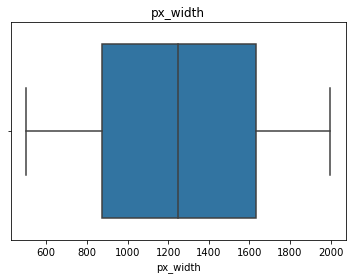

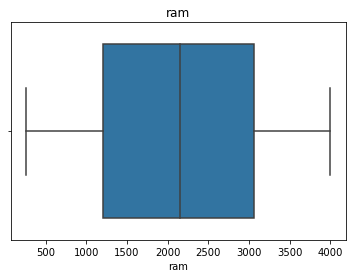

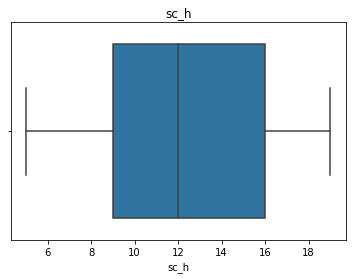

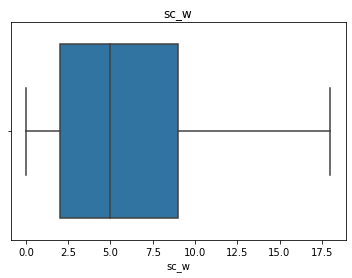

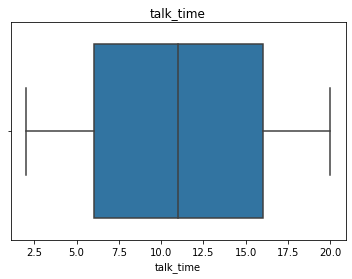

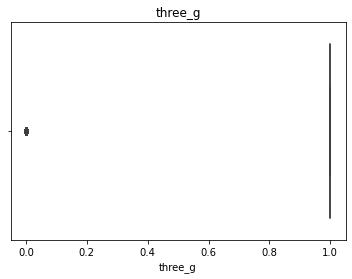

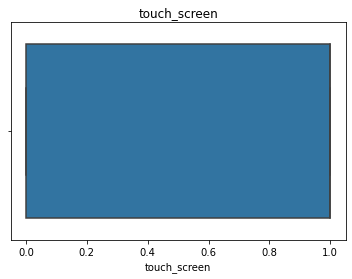

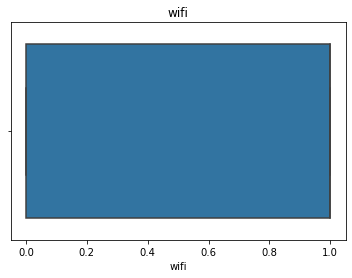

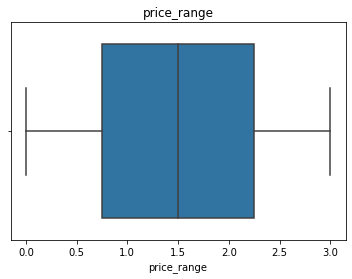

In [25]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.title(i)
    plt.show()

In [26]:
df.describe(percentiles=[0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,2%,3%,5%,50%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,524.96,538.97,570.95,1226.0,1961.06,1974.00,1987.00,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.00,0.00,0.0,1.00,1.00,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,1.5,2.90,2.90,3.00,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,3.0,15.00,16.00,16.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,3.00,5.00,32.0,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.5,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,82.00,83.00,86.00,141.0,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,4.0,8.00,8.00,8.00,8.0


In [27]:
cols_with_outliers = ['battery_power','px_height','px_width','ram']
#                      # min,max   , min,max   , min, max, min,max

In [28]:
def outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.97))
    x = x.clip(lower = x.quantile(0.03))
    return x

In [29]:
df[cols_with_outliers] = df[cols_with_outliers].apply(outlier_treatment)

In [30]:
df.describe(percentiles=[0.03,0.97]).T

,count,mean,std,min,3%,50%,97%,max
battery_power,2000.0,1238.57640,437.369233,538.97,538.9991,1226.0,1961.0018,1961.06
blue,2000.0,0.49500,0.500100,0.00,0.0000,0.0,1.0000,1.00
clock_speed,2000.0,1.52225,0.816004,0.50,0.5000,1.5,2.9000,3.00
dual_sim,2000.0,0.50950,0.500035,0.00,0.0000,1.0,1.0000,1.00
fc,2000.0,4.30950,4.341444,0.00,0.0000,3.0,15.0000,19.00
four_g,2000.0,0.52150,0.499662,0.00,0.0000,1.0,1.0000,1.00
int_memory,2000.0,32.04650,18.145715,2.00,3.0000,32.0,63.0000,64.00
m_dep,2000.0,0.50175,0.288416,0.10,0.1000,0.5,1.0000,1.00
mobile_wt,2000.0,140.24900,35.399655,80.00,83.0000,141.0,198.0000,200.00
n_cores,2000.0,4.52050,2.287837,1.00,1.0000,4.0,8.0000,8.00


In [31]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [32]:
x = df.drop('price_range',axis=1)
y = df['price_range']

In [33]:
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [40]:
m1 = RandomForestClassifier(n_estimators=110,criterion='entropy',
                           max_depth=12,min_samples_split=15)
m1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=15,
                       n_estimators=110)

In [41]:
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))

Training score 0.9906666666666667
Testing score 0.884


In [44]:
ypred_m1 = m1.predict(x_test)

In [45]:
def gen_metrics(y_test,ypred):
    print('Accuracy Score',accuracy_score(y_test,ypred))
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [46]:
gen_metrics(y_test,ypred_m1)

Accuracy Score 0.884
[[110   9   0   0]
 [  6 110  12   0]
 [  0  15 105   4]
 [  0   0  12 117]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       119
           1       0.82      0.86      0.84       128
           2       0.81      0.85      0.83       124
           3       0.97      0.91      0.94       129

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.89       500
weighted avg       0.89      0.88      0.89       500



In [47]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                        'Norm_Imp':m1.feature_importances_})
fimp_m1.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
13,ram,0.609339
0,battery_power,0.069651
12,px_width,0.052367
11,px_height,0.048863
8,mobile_wt,0.029950
6,int_memory,0.026293
16,talk_time,0.019887
15,sc_w,0.019664
10,pc,0.019418
2,clock_speed,0.018496


In [54]:
sig_feat = fimp_m1[fimp_m1['Norm_Imp']>=0.019]
sig_feat.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
13,ram,0.609339
0,battery_power,0.069651
12,px_width,0.052367
11,px_height,0.048863
8,mobile_wt,0.029950
6,int_memory,0.026293
16,talk_time,0.019887
15,sc_w,0.019664
10,pc,0.019418


In [64]:
x_sig = df[sig_feat['Features'].values]
print(x_sig.shape)
print(y.shape)

(2000, 9)
(2000,)


In [68]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_sig,y,test_size=0.25,
                                                     random_state=15)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1500, 9)
(500, 9)
(1500,)
(500,)


In [73]:
m2 = GaussianNB(priors=[0.25,0.25,0.25,0.25])
m2.fit(x_train1,y_train1)

GaussianNB(priors=[0.25, 0.25, 0.25, 0.25])

In [76]:
print('Training score',m2.score(x_train1,y_train1))
print('Testing score',m2.score(x_test1,y_test1))

Training score 0.8053333333333333
Testing score 0.812


In [77]:
ypred_m2 = m2.predict(x_test1)

In [79]:
gen_metrics(y_test1,ypred_m2)

Accuracy Score 0.812
[[107   4   0   0]
 [ 12 100  27   0]
 [  0  20  89  10]
 [  0   0  21 110]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       111
           1       0.81      0.72      0.76       139
           2       0.65      0.75      0.70       119
           3       0.92      0.84      0.88       131

    accuracy                           0.81       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.81      0.81       500



#### MultinomialNB

In [88]:
m3 = MultinomialNB()
m3.fit(x_train1,y_train1)

MultinomialNB()

In [89]:
print('Training score',m3.score(x_train1,y_train1))
print('Testing score',m3.score(x_test1,y_test1))

Training score 0.5206666666666667
Testing score 0.52


In [90]:
ypred_m3 = m3.predict(x_test1)

In [92]:
gen_metrics(y_test1,ypred_m3)

Accuracy Score 0.52
[[87 20  3  1]
 [35 50 33 21]
 [ 5 25 39 50]
 [ 0 15 32 84]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       111
           1       0.45      0.36      0.40       139
           2       0.36      0.33      0.35       119
           3       0.54      0.64      0.59       131

    accuracy                           0.52       500
   macro avg       0.51      0.53      0.52       500
weighted avg       0.51      0.52      0.51       500

